In [1]:
from integrator import rk4, euler, rk3, rk5
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def lorentz(X,t,param):
    """
    @brief  Sistema que modela el atractor de Lorentz
    @ref        (Computational Methods for Physicists Sirca-Horvart)
    @param X    Array de tres variables [x,y,z]
    @param t    Tiempo en el que se calcula la derivada temporal
                de las variables.
    @param param    Array con tres parámetros del sistema [sigma, r, b]
    @return     Un arreglo con la derivada de las variables: [x', y', z'] 
    """
    sig = param[0]
    r = param[1]
    b = param[2]
    dX = np.zeros(3)
    dX[0] = -sig*X[0] + sig*X[1]
    dX[1] = -X[0]*X[2] + r*X[0] - X[1]
    dX[2] = X[0]*X[1] -b*X[2]
    return dX
    
def distance(x1, x2):
    """
    @brief Calcula la distancia euclidiana entre los puntos x1 y x2
    @param x1 Lista con las coordenadas del punto x1
    @param x2 Lista con las coordenadas del punto x2
    @return Distancia
    """
    d = 0
    for i in range(len(x1)):
        d += (x1[i] - x2[i])**2
    return d**0.5 

#### Parámetros iniciales

In [3]:
X0 = np.array([0., 1., 0.])
param = [10., 28., 8./3.]

#### Solución usando RK4

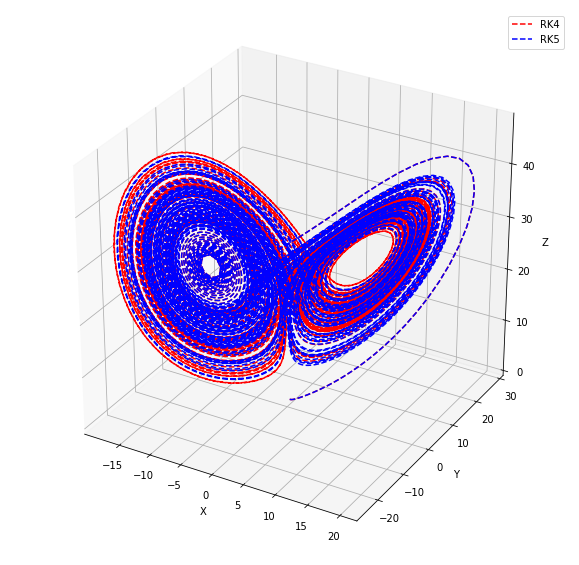

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

sol = rk4.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]
ax.plot(x, y, z,'--r',label="RK4")

sol = rk5.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]

ax.plot(x, y, z,'--b',label="RK5")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.legend()
#Rotación del punto de vista para que coincida con el ejemplo
#ax.view_init(22, -162)
plt.show()

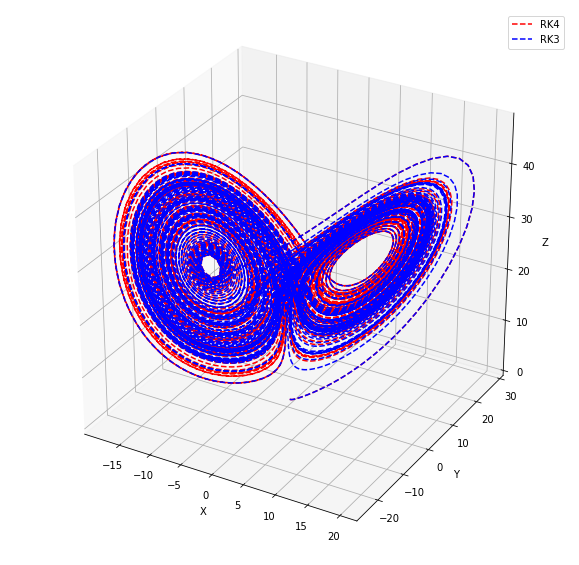

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

sol = rk4.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]
ax.plot(x, y, z,'--r',label="RK4")

sol = rk3.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]

ax.plot(x, y, z,'--b',label="RK3")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.legend()
#Rotación del punto de vista para que coincida con el ejemplo
#ax.view_init(22, -162)
plt.show()

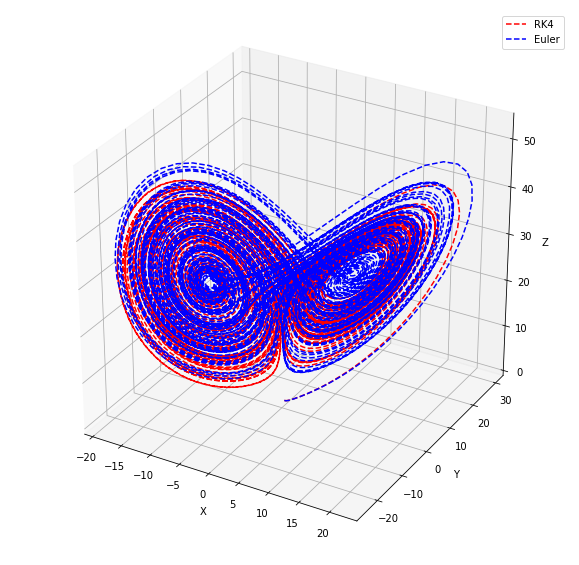

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

sol = rk4.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]
ax.plot(x, y, z,'--r',label="RK4")

sol = euler.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]

ax.plot(x, y, z,'--b',label="Euler")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.legend()
#Rotación del punto de vista para que coincida con el ejemplo
#ax.view_init(22, -162)
plt.show()

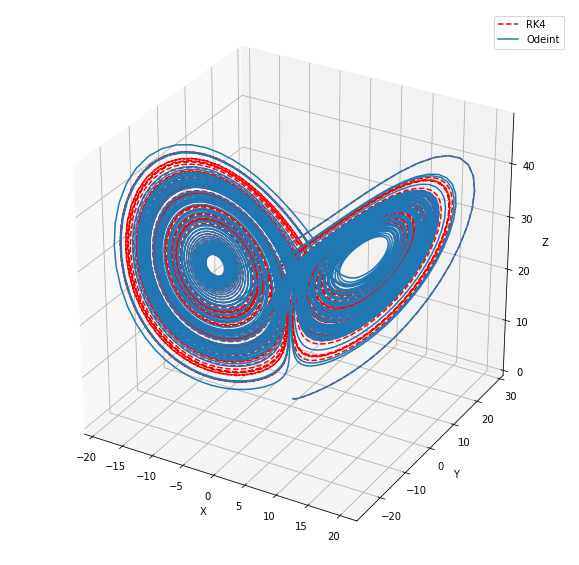

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

sol = rk4.solve(lorentz, X0, 0., 100., 10000, param)
t = sol[0]
x = sol[1][:,0]
y = sol[1][:,1]
z = sol[1][:,2]
ax.plot(x, y, z,'--r',label="RK4")

sol = odeint(lorentz, X0, t, args=(param,))
ax.plot(sol[:,0], sol[:,1], sol[:,2],label="Odeint")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.legend()
#Rotación del punto de vista para que coincida con el ejemplo
#ax.view_init(22, -162)
plt.show()

#### Comparación con Odeint

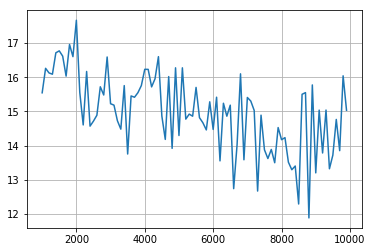

In [12]:
N = []
difEulerRk4 = []
difOdeintRk4 = []
for n in range(1000,10000,100):
    sRk4 = rk4.solve(lorentz, X0, 0., 100., n, param)
    sOdeint = odeint(lorentz, X0, sRk4[0], args=(param,))
    difOdeintRk4.append(distance([sRk4[1][:,0],sRk4[1][:,1],sRk4[1][:,2]],
                             [sOdeint[:,0],sOdeint[:,1],sOdeint[:,2]]).mean())
    N.append(n)

plt.plot(N,difOdeintRk4)
plt.grid()
plt.show()

#### Comparación con Euler

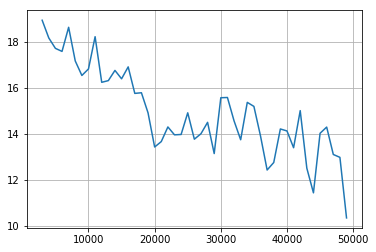

In [13]:
N = []
for n in range(3000,50000,1000):
    sRk4 = rk4.solve(lorentz, X0, 0., 50., n, param)
    sEuler = euler.solve(lorentz, X0, 0., 50., n, param)
    difEulerRk4.append(distance([sRk4[1][:,0],sRk4[1][:,1],sRk4[1][:,2]],
                            [sEuler[1][:,0],sEuler[1][:,1],sEuler[1][:,2]]).mean())
    N.append(n)
    
plt.plot(N,difEulerRk4)
plt.grid()
plt.show()

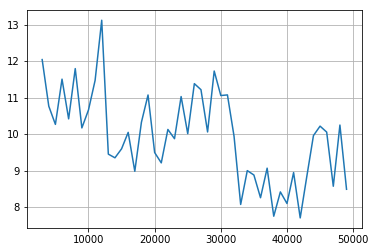

In [14]:
N = []
sRk3 = []
difRk3Rk4 = []
for n in range(3000,50000,1000):
    sRk4 = rk4.solve(lorentz, X0, 0., 50., n, param)
    sRk3 = rk3.solve(lorentz, X0, 0., 50., n, param)
    difRk3Rk4.append(distance([sRk4[1][:,0],sRk4[1][:,1],sRk4[1][:,2]],
                            [sRk3[1][:,0],sRk3[1][:,1],sRk3[1][:,2]]).mean())
    N.append(n)
    
plt.plot(N,difRk3Rk4)
plt.grid()
plt.show()

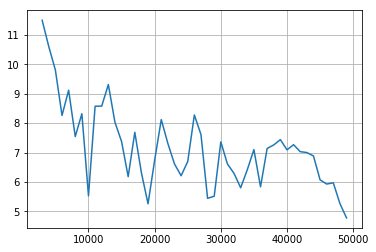

In [15]:
N = []
sRk5 = []
difRk5Rk4 = []
for n in range(3000,50000,1000):
    sRk4 = rk4.solve(lorentz, X0, 0., 50., n, param)
    sRk5 = rk5.solve(lorentz, X0, 0., 50., n, param)
    difRk5Rk4.append(distance([sRk4[1][:,0],sRk4[1][:,1],sRk4[1][:,2]],
                            [sRk5[1][:,0],sRk5[1][:,1],sRk5[1][:,2]]).mean())
    N.append(n)
    
plt.plot(N,difRk5Rk4)
plt.grid()
plt.show()